In [1]:
from single_node import threshold_image
from parallel import parallel_thresholding
from tests import benchmark

import cv2
from PIL import Image

In [2]:
HEIGHT_WIDTH = (300, 300) 

#### Person's Image Thresholding 

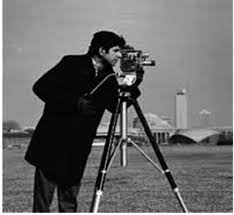

In [3]:
person_img = cv2.imread("C:\\Users\\puert\\OneDrive\\Escritorio\\thresholding\\img\\person.jpeg", cv2.IMREAD_GRAYSCALE)
Image.fromarray(person_img)

The optimal threshold is: 79.0
CPU times: total: 0 ns
Wall time: 1.22 ms


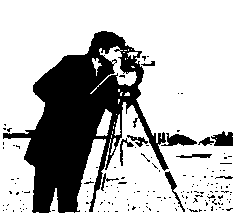

In [4]:
%%time
Image.fromarray(threshold_image(person_img))

The optimal thresholds for each partition are: [156.0, 85.0, 84.0, 77.0, 79.0, 71.0, 60.0, 66.0]
The optimal threshold is: 84
CPU times: total: 281 ms
Wall time: 2.82 s


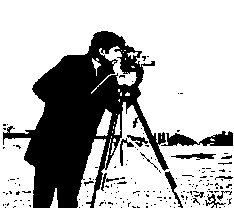

In [5]:
%%time
Image.fromarray(parallel_thresholding(person_img, False)) #Thresholding with mean of all partitions

The optimal thresholds for each partition are: [156.0, 85.0, 84.0, 77.0, 79.0, 71.0, 60.0, 66.0]
The optimal threshold is: 84
CPU times: total: 391 ms
Wall time: 2.7 s


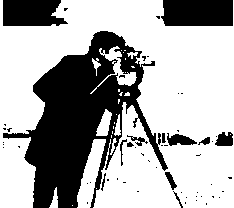

In [6]:
%%time
Image.fromarray(parallel_thresholding(person_img, True)) #Thresholding with optimal threshold of all partitions

#### Dog's Image Thresholding

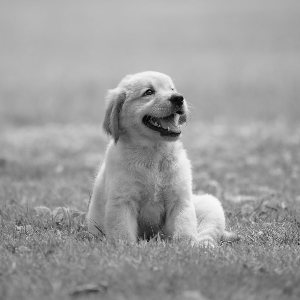

In [7]:
dog_img = cv2.imread("C:\\Users\\puert\\OneDrive\\Escritorio\\thresholding\\img\\dog.jpg", cv2.IMREAD_GRAYSCALE)
dog_img = cv2.resize(dog_img, HEIGHT_WIDTH)
Image.fromarray(dog_img)

The optimal threshold is: 151.0
CPU times: total: 0 ns
Wall time: 0 ns


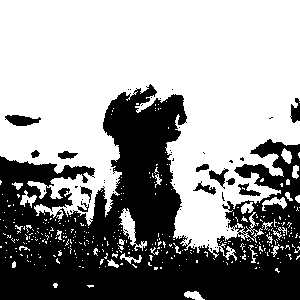

In [8]:
%%time
Image.fromarray(threshold_image(dog_img))

The optimal thresholds for each partition are: [178.0, 179.0, 126.0, 129.0, 160.0, 174.0, 148.0, 128.0]
The optimal threshold is: 152
CPU times: total: 219 ms
Wall time: 2.96 s


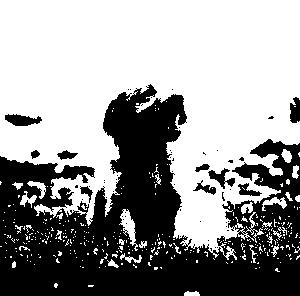

In [9]:
%%time
Image.fromarray(parallel_thresholding(dog_img, False)) #Thresholding with mean of all partitions

The optimal thresholds for each partition are: [178.0, 179.0, 126.0, 129.0, 160.0, 174.0, 148.0, 128.0]
The optimal threshold is: 152
CPU times: total: 266 ms
Wall time: 2.47 s


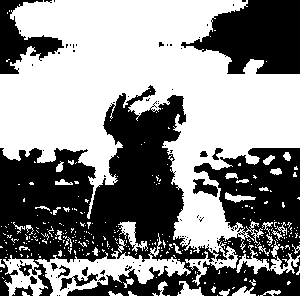

In [10]:
%%time
Image.fromarray(parallel_thresholding(dog_img, True)) #Thresholding with optimal threshold of all partitions

In [ ]:
results = benchmark(["C:\\Users\\puert\\OneDrive\\Escritorio\\thresholding\\img\\person.jpeg",
           "C:\\Users\\puert\\OneDrive\\Escritorio\\thresholding\\img\\dog.jpg"])

In [16]:
results[0]

,threshold_single_node_time,voting_parallel_thresholding_time,non_voting_parallel_thresholding_time,file_name
0,-4.000030e-07,-9.000069e-07,-7.000053e-07,person.jpeg
1,-4.000030e-07,-7.998897e-07,-5.000038e-07,person.jpeg
2,-5.000038e-07,-9.000069e-07,-6.000046e-07,person.jpeg


In [ ]:
results[1]